In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *# Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda,Dropout
#from tensorflow.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import concatenate
#from matplotlib import pyplot as plt
#import keras.backend as K

import numpy as np
import pickle
import os, cv2

#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

# %matplotlib inline
#root='/content/drive/My Drive/Car Data/'
root=''
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

In [2]:
tf.__version__

'1.12.0'

In [3]:
train_data=[]
train_label=[]
for i in range(500):
     train_data.append(cv2.imread(root+'AS1s_123/Rec_iLQR_f/'+str(i)+'.jpg'))
     train_label.append(cv2.imread(root+'AS1s_123/Rec_iLQR_f/s_'+str(i)+'.jpg'))
val_data=[]
val_label=[]
for i in range(500):
     val_data.append(cv2.imread(root+'AS2s_123/Rec_iLQR_f/'+str(i)+'.jpg'))
     val_label.append(cv2.imread(root+'AS2s_123/Rec_iLQR_f/s_'+str(i)+'.jpg'))

test_data3=[]
test_label3=[]
for i in range(256):
     test_data3.append(cv2.imread(root+'AS3s_CT_123/Rec_iLQR_f/'+str(i)+'.jpg'))
     test_label3.append(cv2.imread(root+'AS3s_CT_123/Rec_iLQR_f/s_'+str(i)+'.jpg'))
test_data4=[]
test_label4=[]
for i in range(256):
     test_data4.append(cv2.imread(root+'AS4s_CT_123/Rec_iLQR_f/'+str(i)+'.jpg'))
     test_label4.append(cv2.imread(root+'AS4s_CT_123/Rec_iLQR_f/s_'+str(i)+'.jpg'))
#for i in range(400):
#     train_data.append(cv2.imread(root+'AS1s_123/Rec_iLQR_f/'+str(i)+'.jpg'))

In [4]:
_train_data=np.array(train_data)/255.0
_train_label=np.array(train_label)/255.0
_val_data=np.array(val_data)/255.0
_val_label=np.array(val_label)/255.0
_test_data3=np.array(test_data3)/255.0
_test_label3=np.array(test_label3)/255.0
_test_data4=np.array(test_data4)/255.0
_test_label4=np.array(test_label4)/255.0

In [5]:
road_id=np.array([250,12,197],dtype=np.float64)
car_id=np.array([220,198,220],dtype=np.float64)
ohe_train_label=[]
ohe_val_label=[]
W=train_data[0].shape[0]
H=train_data[0].shape[1]
out_ch=3
for i in range(500):
  #img=train_label[i].copy()
  img=np.zeros((W,H,out_ch),dtype=np.float64)
  lower = road_id-15#np.array([245,0,190], dtype = "uint8")
  upper = road_id+15#np.array([255,20,210], dtype = "uint8")
  road=cv2.inRange(train_label[i],lower,upper)
  lower = car_id-10#np.array([245,0,190], dtype = "uint8")
  upper = car_id+10#np.array([255,20,210], dtype = "uint8")
  car=cv2.inRange(train_label[i],lower,upper)
  img[:,:,0]=road
  img[:,:,1]=car
  img[:,:,2]=np.array(~road + car,dtype=np.float64)#np.zeros_like(road)
  ohe_train_label.append(img)

for i in range(100):
  img=np.zeros((W,H,out_ch),dtype=np.float64)
  #img=train_label[i].copy()
  lower = road_id-15#np.array([245,0,190], dtype = "uint8")
  upper = road_id+15#np.array([255,20,210], dtype = "uint8")
  road=cv2.inRange(train_label[i],lower,upper)
  lower = car_id-10#np.array([245,0,190], dtype = "uint8")
  upper = car_id+10#np.array([255,20,210], dtype = "uint8")
  car=cv2.inRange(train_label[i],lower,upper)
  img[:,:,0]=road
  img[:,:,1]=car
  img[:,:,2]=np.array(~road + car,dtype=np.float64)#np.zeros_like(road)
  ohe_val_label.append(img)

  #plt.imshow(img)
  #plt.show()
ohe_train_label=np.array(ohe_train_label,dtype=np.float64)/255.0
ohe_val_label=np.array(ohe_val_label,dtype=np.float64)/255.0

In [6]:
from tensorflow.keras import backend as keras
#keras.tensorflow_backend._get_available_gpus()

In [7]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [8]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
#from tensorflow.nn.layers import cov2d as Conv2D
from tensorflow.keras.optimizers import *
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
#from keras import backend as keras
#keras.tensorflow_backend._get_available_gpus()
N=64
def unet(pretrained_weights = None,input_size = (144,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(16*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(16*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(8*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(4*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(2*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(out_ch, 1, activation = 'softmax')(conv9)
    

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
model=unet()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 144, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 144, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 144, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 72, 128, 64)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
i=120
model.load_weights('unet_wts.h5')

pred_imgs1=[]
for i in range(0,len(_train_data)):
    pred=model.predict(_train_data[i:i+1])
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs1.append(pred_img)
    #plt.imshow(ret)
pred_imgs2=[]
for i in range(0,len(val_data)):
    pred=model.predict(_val_data[i:i+1])
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs2.append(pred_img)
pred_imgs3=[]
for i in range(0,250):
    pred=model.predict(_test_data3[i:i+1])
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs3.append(pred_img)
    #plt.imshow(ret)
pred_imgs4=[]
for i in range(0,250):
    pred=model.predict(_test_data4[i:i+1])
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs4.append(pred_img)

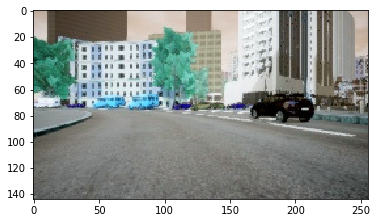

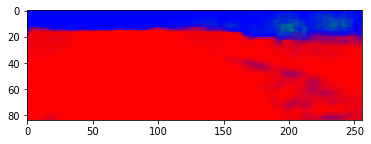

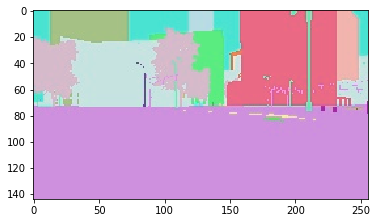

In [10]:
from matplotlib import pyplot as plt
res=np.zeros((W,H,3),dtype=np.float64)
res1=np.zeros((W,H,3),dtype=np.float64)
pred=model.predict(_test_data3[i:i+1])
#res1[:,:,:out_ch]=ohe_test_label[i].copy()
plt.imshow(_test_data3[i])
plt.show()
plt.imshow(pred[0,60:,:,:])
plt.show()
#plt.imshow(res1)
#plt.show()
plt.imshow(_test_label3[i])
plt.show()

In [11]:
#model.save('unet_wts.h5')

In [12]:
import pickle
f=open('AS1s_123/dataset_iLQR','rb')
dataset1=pickle.load(f)
f.close()
import pickle
f=open('AS2s_123/dataset_iLQR','rb')
dataset2=pickle.load(f)
f.close()
f=open('AS3s_CT_123/dataset_iLQR','rb')
dataset3=pickle.load(f)
f.close()
import pickle
f=open('AS4s_CT_123/dataset_iLQR','rb')
dataset4=pickle.load(f)
f.close()

In [13]:
dataset3.keys()

dict_keys(['state', 'traj', 'image', 'action', 'next_sate', 'time_reward'])

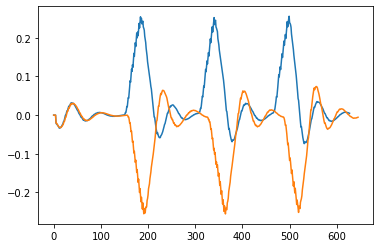

In [14]:
steer1=np.array(dataset1['action'],dtype=np.float64)[:,1]
steer2=np.array(dataset2['action'],dtype=np.float64)[:,1]
steer3=np.array(dataset3['action'],dtype=np.float64)[:,1]
steer4=np.array(dataset4['action'],dtype=np.float64)[:,1]
plt.plot(steer1)
plt.plot(steer2)
plt.show()
plt.plot(steer3)
plt.plot(steer4)
plt.show()

In [15]:
#plt.imshow(pred_imgs3[0][60:,:,0])
cxy1=[]
cxy2=[]
for i in range(250):
    M=cv2.moments(pred_imgs1[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy1.append([cx,cy])
cxy1=np.array(cxy1,dtype=np.int)
for i in range(250):
    M=cv2.moments(pred_imgs2[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy2.append([cx,cy])
cxy2=np.array(cxy2,dtype=np.int)
cxy3=[]
cxy4=[]
for i in range(250):
    M=cv2.moments(pred_imgs3[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy3.append([cx,cy])
cxy3=np.array(cxy3,dtype=np.int)
for i in range(250):
    M=cv2.moments(pred_imgs4[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy4.append([cx,cy])
cxy4=np.array(cxy4,dtype=np.int)
oxy3=[]
oxy4=[]
for i in range(250):
    M=cv2.moments(pred_imgs3[i][60:,:,1])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    oxy3.append([cx,cy])
oxy3=np.array(oxy3,dtype=np.int)
for i in range(250):
    M=cv2.moments(pred_imgs4[i][60:,:,1])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    oxy4.append([cx,cy])
oxy4=np.array(oxy4,dtype=np.int)

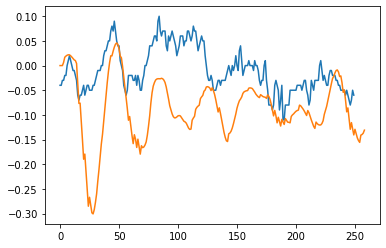

In [16]:
_cxy3=(cxy3[:,1]-128)*0.01
plt.plot(_cxy3)
#plt.plot(cxy4[:,1]-125)
#plt.show()
#plt.plot(oxy3[:,1])
#plt.plot(oxy4[:,1])
#plt.show()
plt.plot(steer3[:])
#plt.plot(steer4)
plt.show()

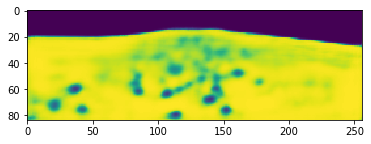

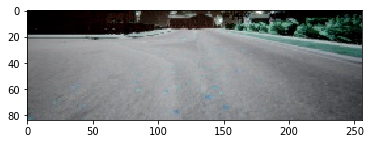

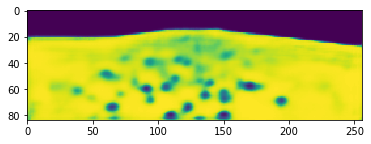

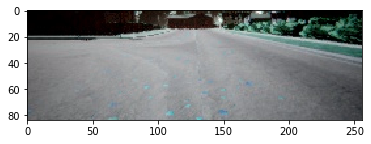

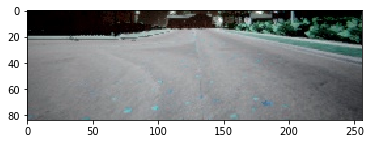

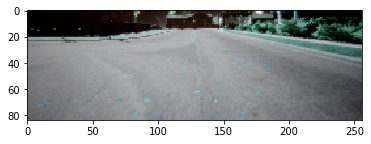

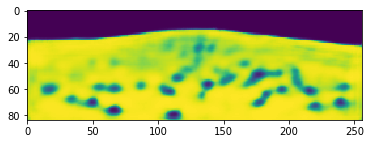

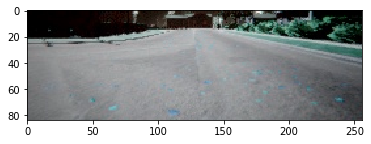

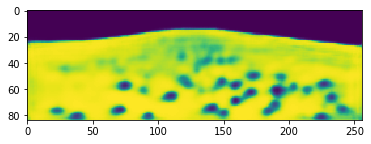

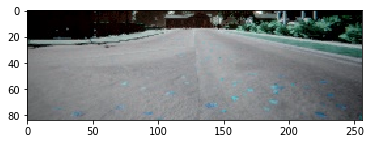

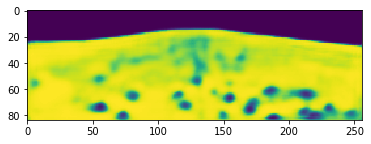

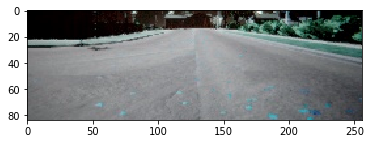

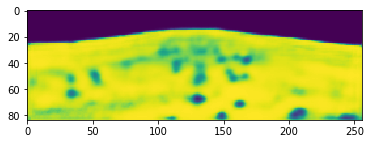

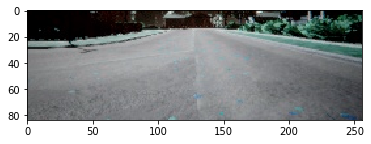

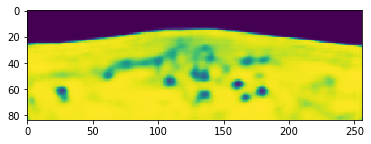

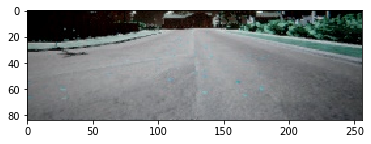

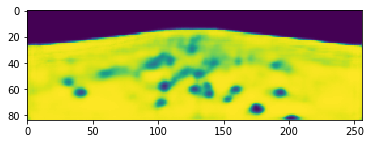

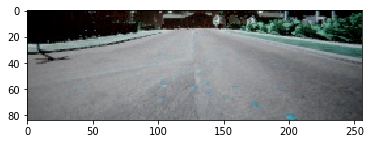

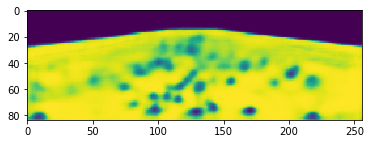

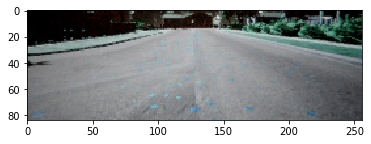

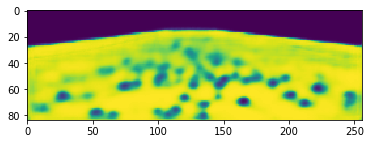

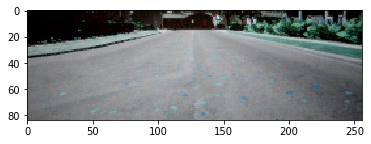

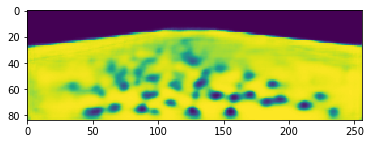

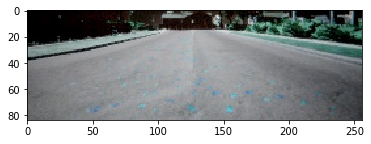

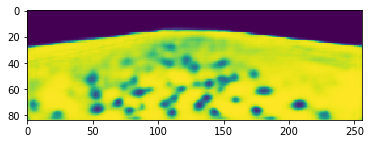

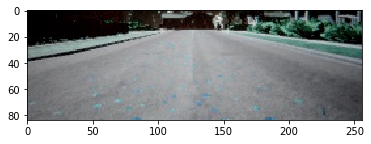

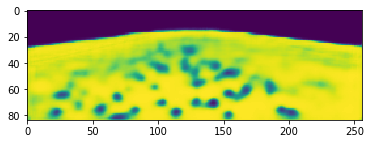

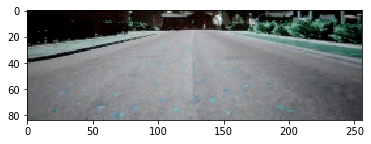

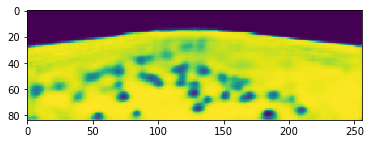

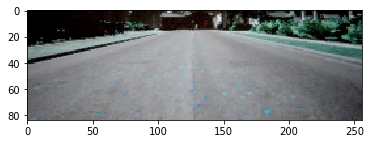

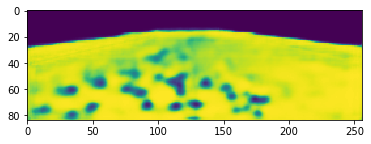

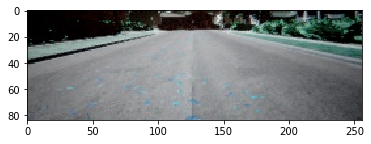

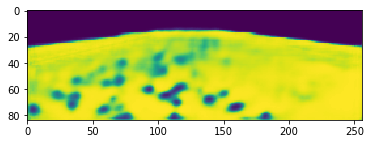

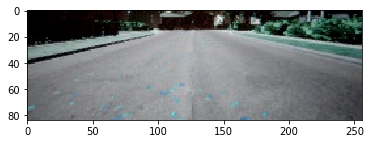

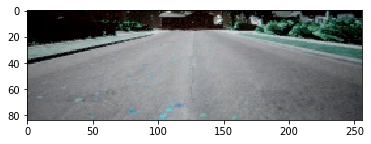

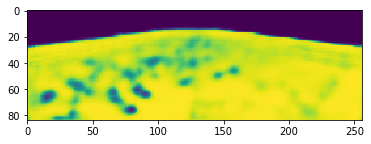

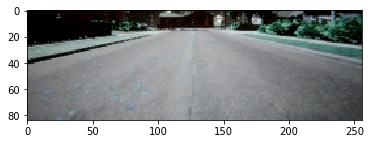

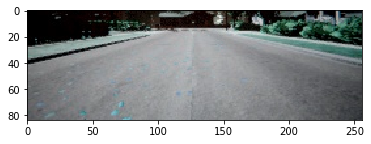

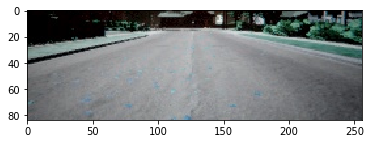

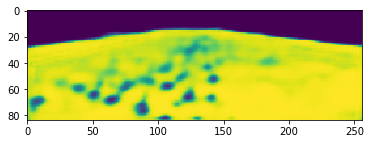

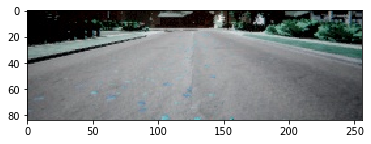

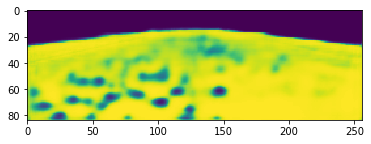

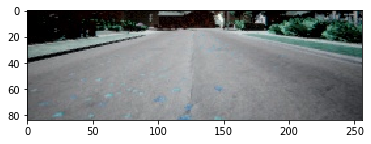

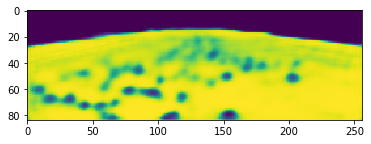

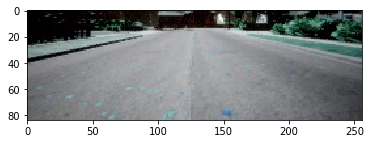

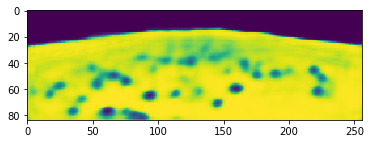

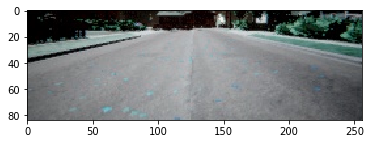

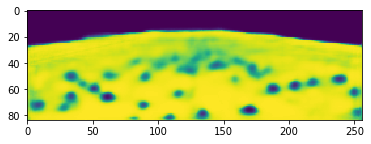

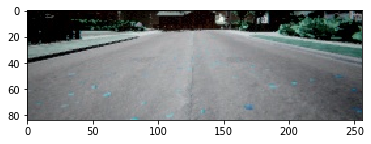

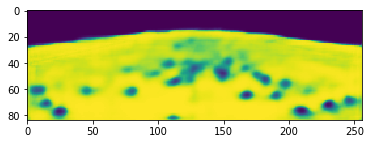

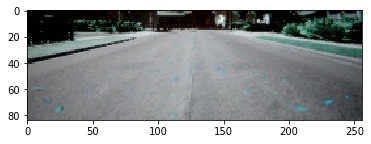

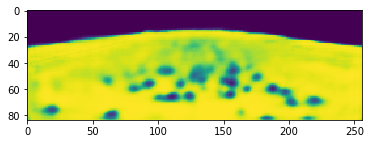

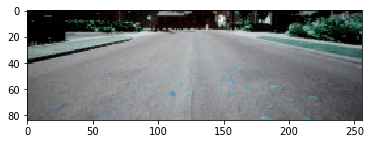

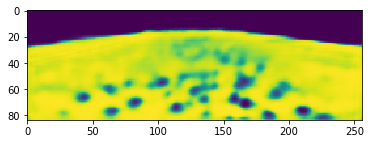

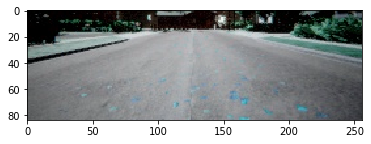

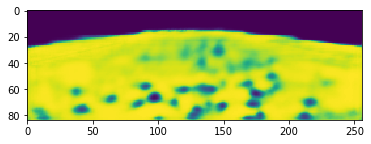

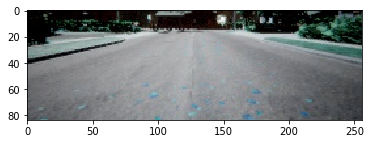

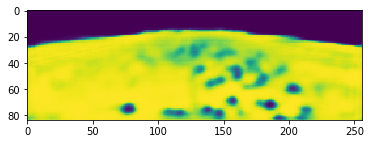

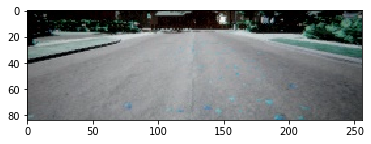

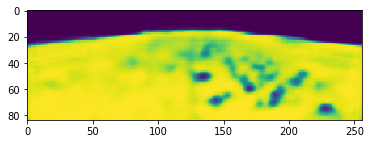

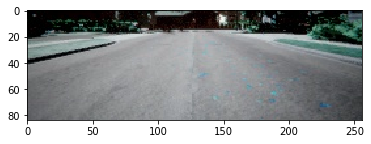

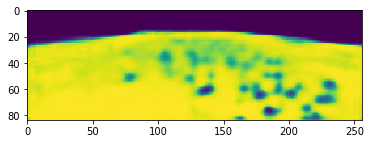

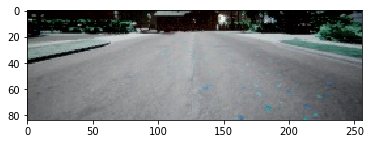

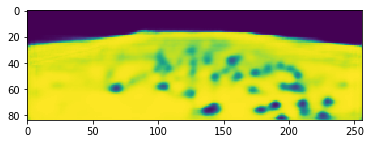

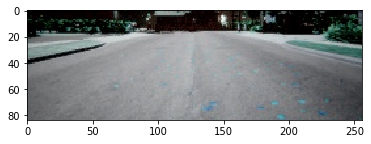

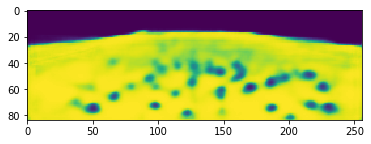

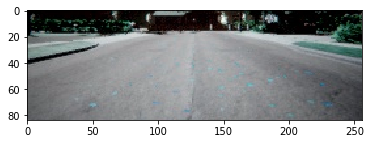

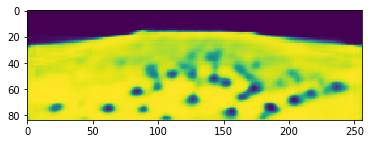

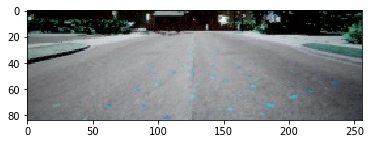

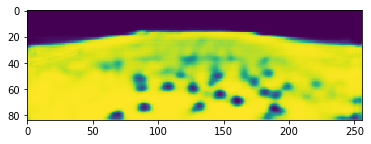

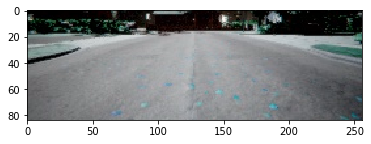

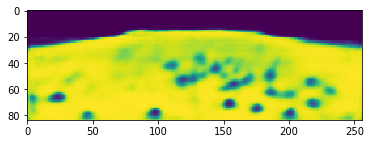

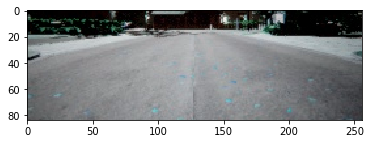

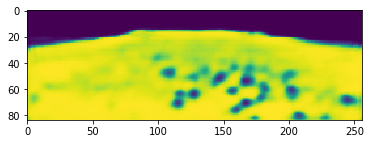

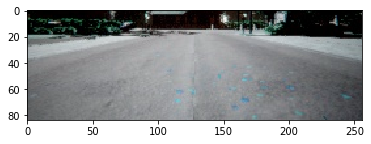

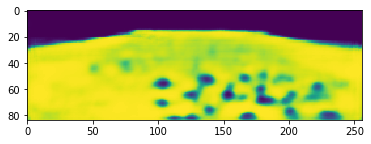

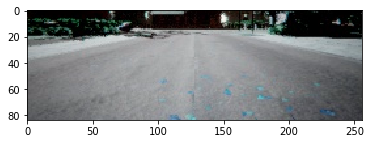

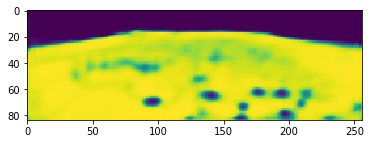

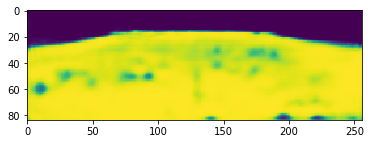

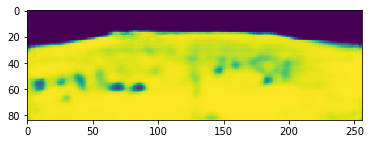

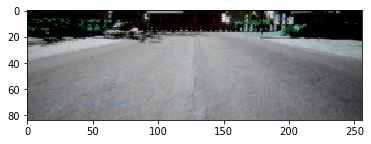

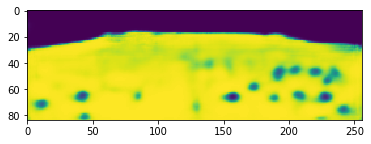

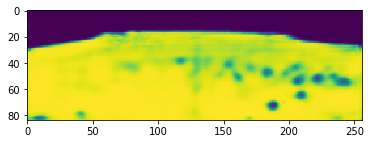

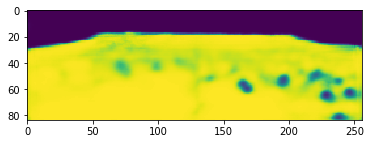

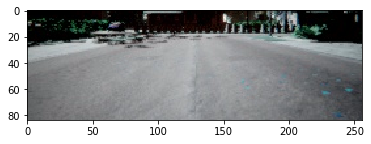

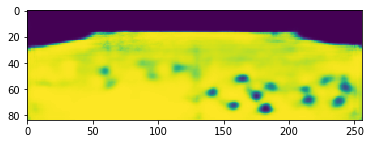

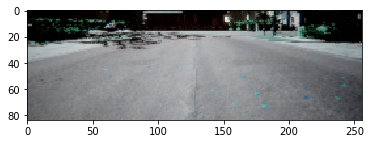

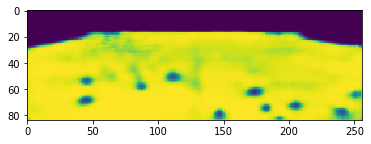

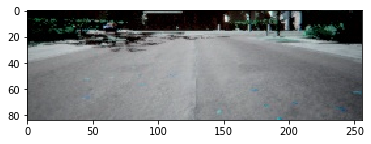

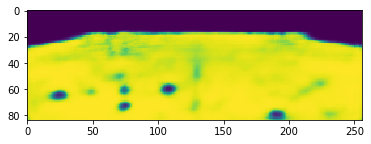

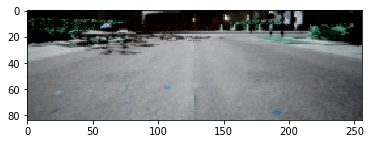

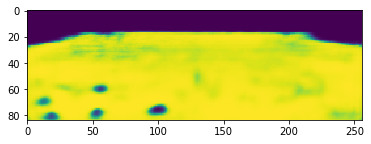

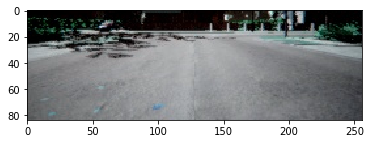

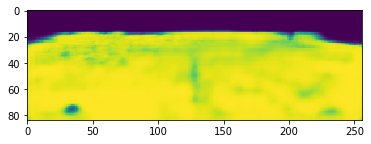

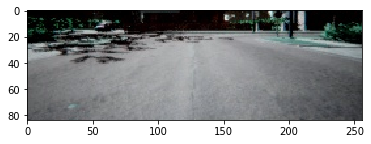

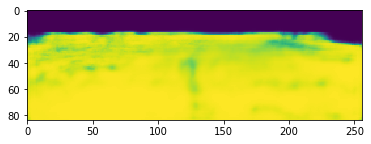

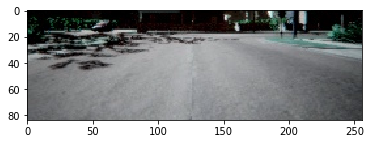

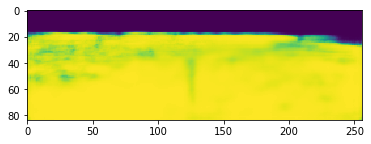

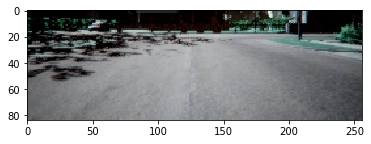

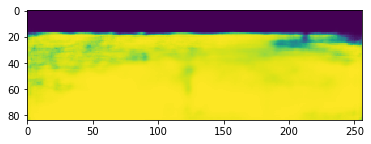

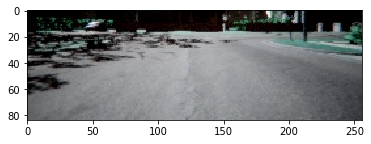

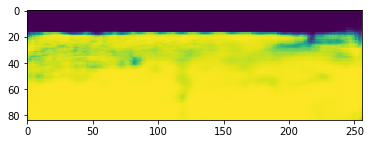

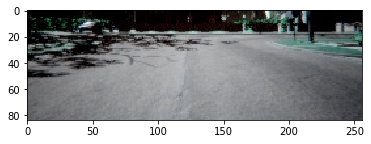

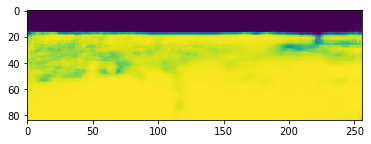

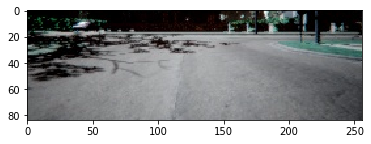

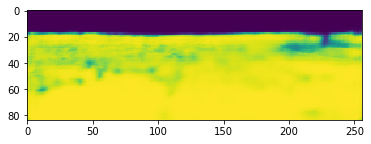

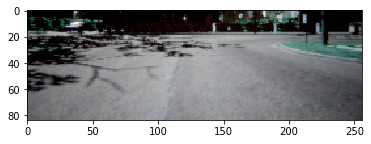

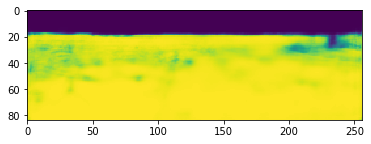

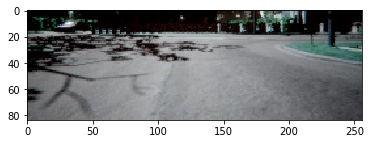

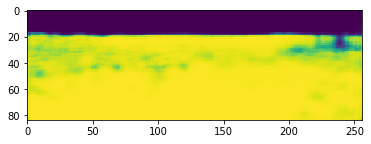

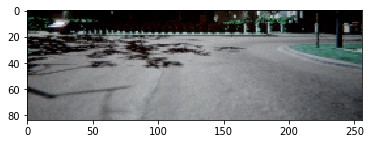

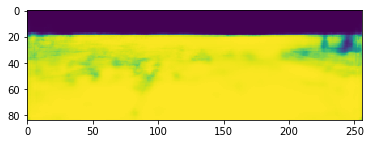

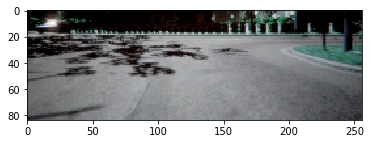

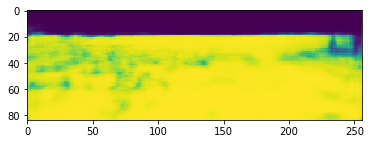

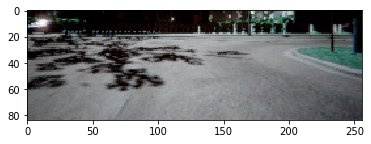

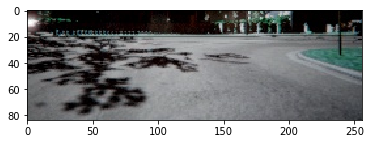

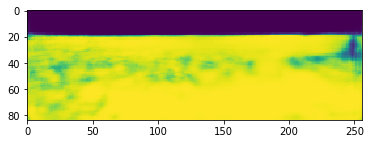

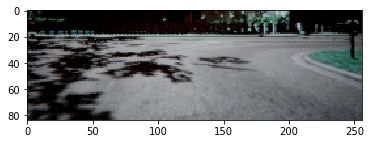

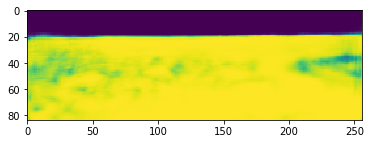

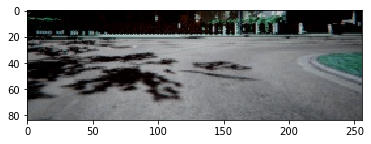

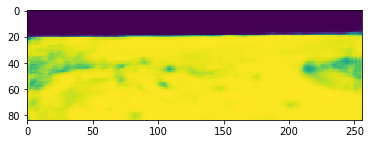

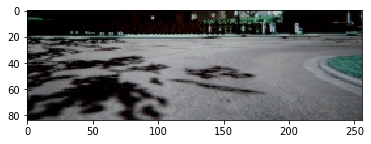

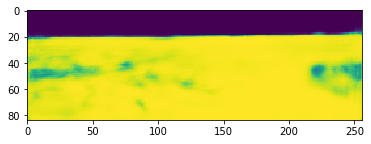

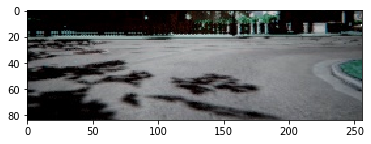

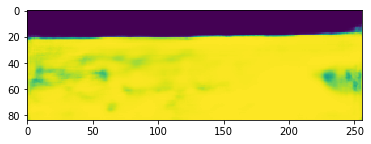

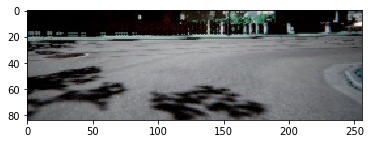

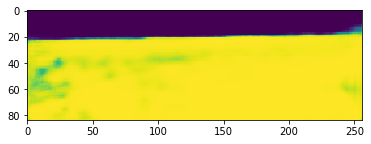

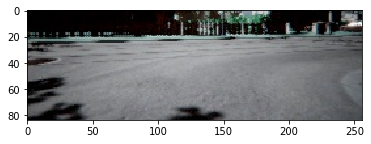

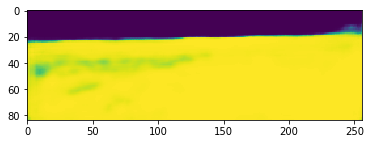

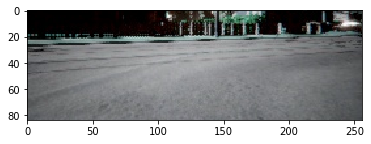

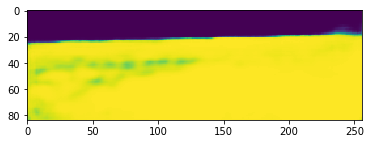

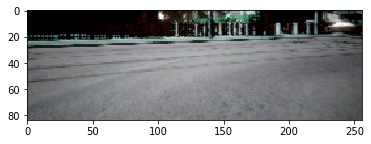

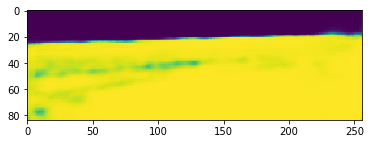

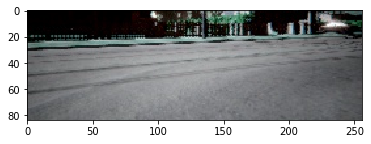

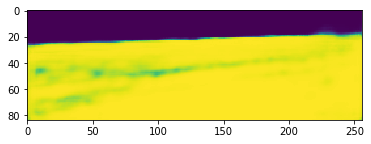

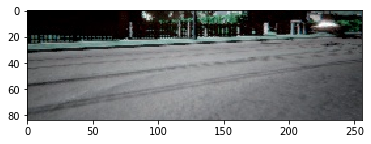

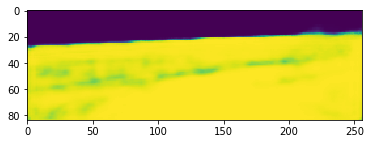

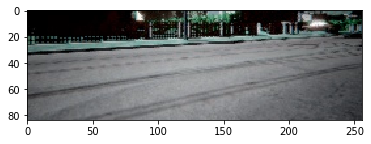

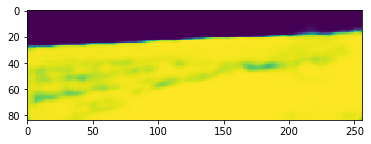

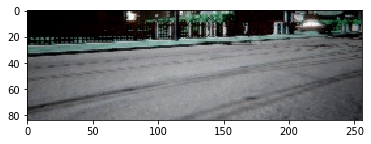

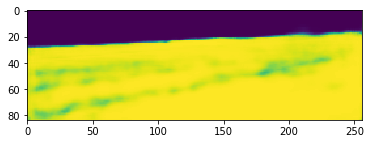

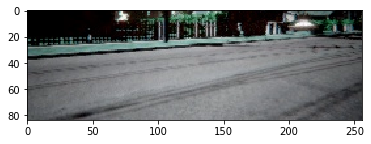

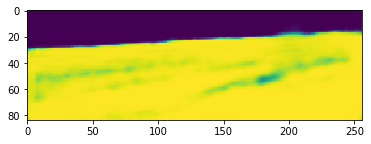

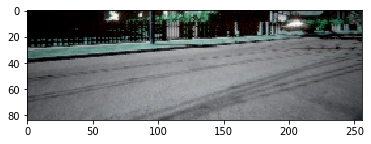

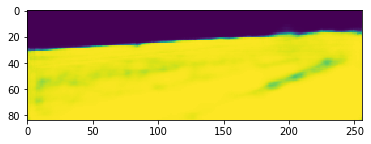

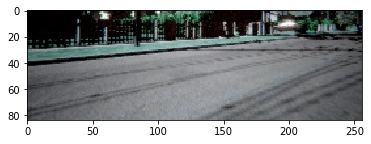

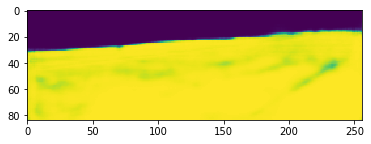

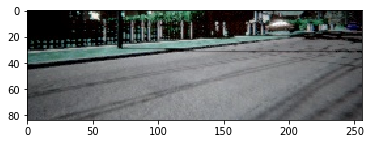

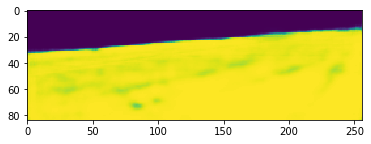

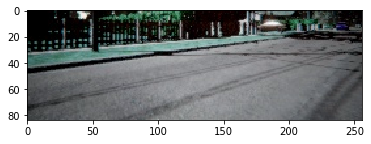

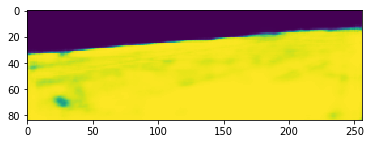

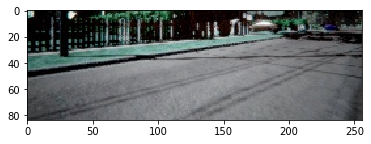

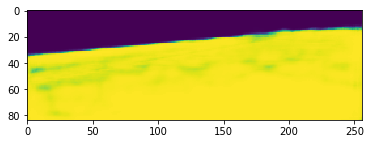

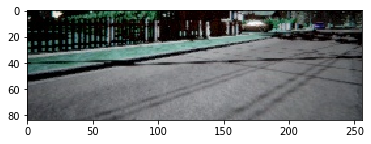

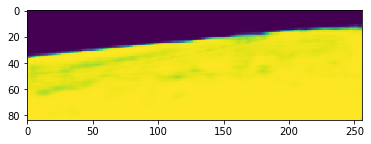

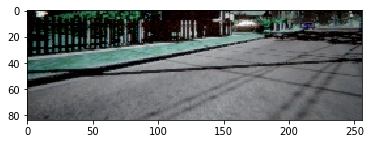

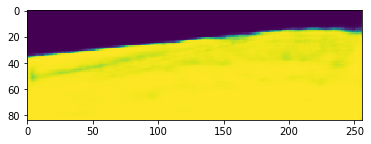

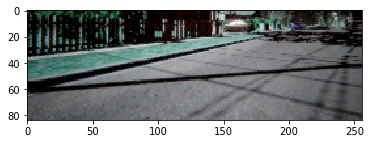

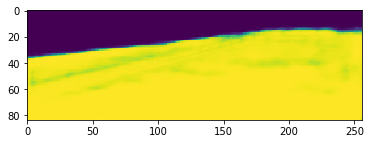

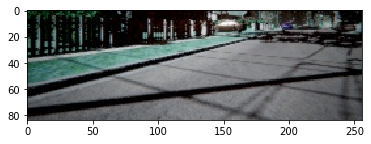

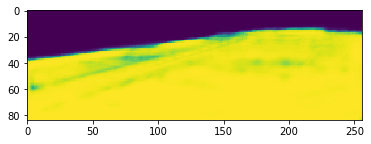

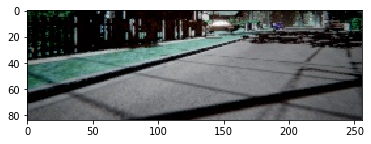

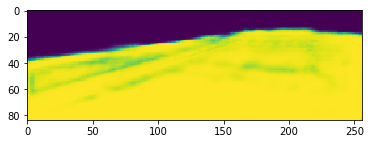

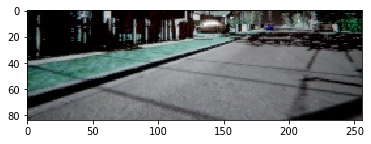

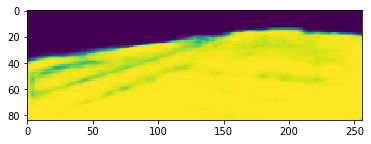

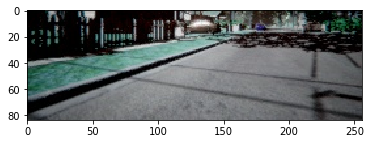

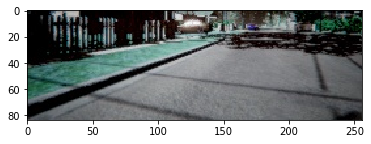

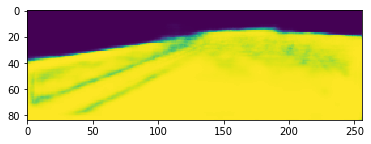

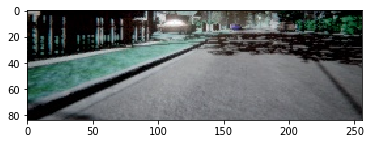

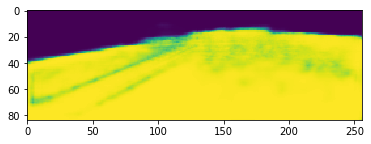

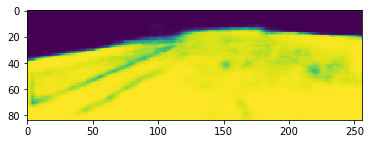

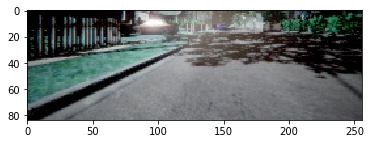

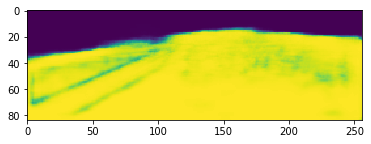

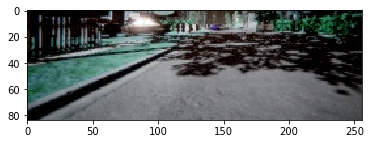

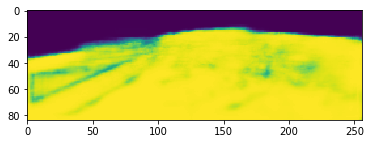

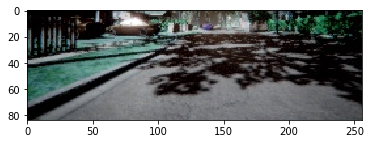

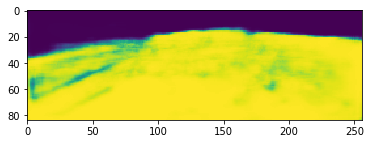

In [21]:

for i in range(100,200):
     plt.imshow(pred_imgs1[i][60:,:,0])#*_test_data3[i][60:,:,0])
     plt.show()
     plt.imshow(_train_data[i][60:,:,:])
     plt.show()

In [22]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
#from tensorflow.nn.layers import cov2d as Conv2D
from tensorflow.keras.optimizers import *
from tensorflow.keras import regularizers
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
#from keras import backend as keras
#keras.tensorflow_backend._get_available_gpus()
N=64
def steer_net(pretrained_weights = None,input_size = (144,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',kernel_regularizer=regularizers.l2(0.1))(inputs)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',kernel_regularizer=regularizers.l2(0.1))(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(N//2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',kernel_regularizer=regularizers.l2(0.1))(pool1)
    conv2 = Conv2D(N//2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal',kernel_regularizer=regularizers.l2(0.1))(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #conv3 = Conv2D(N/4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    #conv3 = Conv2D(N/4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #conv4 = Conv2D(N/8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    #conv4 = Conv2D(N/8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #drop4 = Dropout(0.5)(conv4)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    flat= Flatten()(pool2)
    #flat= Dense(512)(flat)
    #flat= Dense(1024)(flat)
    #flat= Dense(16)(flat)
    #flat= Dense(8)(flat)
    out= Dense(1,kernel_regularizer=regularizers.l2(0.01))(flat)

    model = Model(inputs, out)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'mse', metrics = ['accuracy'])
    
    model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
model=steer_net()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 144, 256, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 144, 256, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 144, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 72, 128, 64)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 128, 32)       18464     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 128, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 64, 32)        0         
__________

In [47]:
seg_img=np.concatenate((_test_data3,_test_data4))#,_train_data),axis=0)
steer_data=np.concatenate((steer3[:256],steer4[:256]))#,steer1[:500]),axis=0)
seg_data.shape
len(steer1)

628

In [48]:
history=model.fit(seg_img,steer_data,batch_size=10,epochs=20,validation_data=(_val_data,steer2[:500]))

Train on 512 samples, validate on 500 samples
Epoch 1/20
512/512 [==============================] - 4s 8ms/step - loss: 36.6949 - acc: 0.0059 - val_loss: 35.0712 - val_acc: 0.0020
Epoch 2/20
512/512 [==============================] - 3s 6ms/step - loss: 33.6640 - acc: 0.0059 - val_loss: 32.2544 - val_acc: 0.0020
Epoch 3/20
512/512 [==============================] - 3s 7ms/step - loss: 30.9540 - acc: 0.0059 - val_loss: 29.6588 - val_acc: 0.0020
Epoch 4/20
512/512 [==============================] - 3s 7ms/step - loss: 28.4823 - acc: 0.0059 - val_loss: 27.3066 - val_acc: 0.0020
Epoch 5/20
512/512 [==============================] - 3s 7ms/step - loss: 26.2374 - acc: 0.0059 - val_loss: 25.1686 - val_acc: 0.0020
Epoch 6/20
512/512 [==============================] - 3s 7ms/step - loss: 24.1996 - acc: 0.0059 - val_loss: 23.2307 - val_acc: 0.0020
Epoch 7/20
512/512 [==============================] - 3s 7ms/step - loss: 22.3520 - acc: 0.0059 - val_loss: 21.4739 - val_acc: 0.0020
Epoch 8/20
512/5

In [49]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss[5:])
plt.plot(val_loss[5:])
plt.show()

In [50]:
pred_steer1=model.predict(_train_data)
pred_steer2=model.predict(_val_data)
pred_steer3=model.predict(_test_data3)
pred_steer4=model.predict(_test_data4)

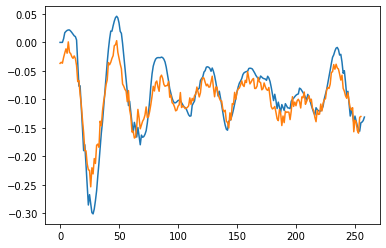

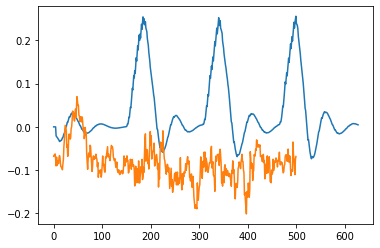

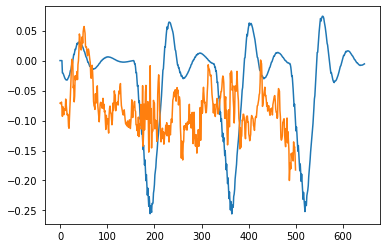

In [56]:
plt.plot(steer3)
#plt.show() 
plt.plot(pred_steer3)
plt.show()
plt.plot(steer4)
#plt.show()
plt.plot(pred_steer4)
plt.show()
plt.plot(steer1)
#plt.show()
plt.plot(pred_steer1)
plt.show()
plt.plot(steer2)
#plt.show()
plt.plot(pred_steer2)
plt.show()